In [57]:
## importacion de la data 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('./data_set/student-mat.csv', sep=';')

def cambioTextNum(df, nomCol, tipo):
    df[nomCol] = df[nomCol].astype(tipo)
    return df[nomCol]

def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" %
              (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" %
              ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" %
                  (col_name[i], dtyp[i], uniq[i], na_val[i]))

    else:
        print("Se esperaba dataframe %15s" % (type(df)))

def histoPlot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [31]:
datos_NA(data)

Dimensiones : 395 filas, 33 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                school     object            2          0
                                   sex     object            2          0
                                   age      int64            8          0
                               address     object            2          0
                               famsize     object            2          0
                               Pstatus     object            2          0
                                  Medu      int64            5          0
                                  Fedu      int64            5          0
                                  Mjob     object            5          0
                                  Fjob     object            5          0
                                reason     object            4          0
                              guardian     object

In [32]:
data['sex'] = camTextBi(data,'sex','F',0,1)
data['school'] = camTextBi(data,'school','GP',0,1)
data['address'] = camTextBi(data,'address','U',0,1)
data['famsize'] = camTextBi(data,'famsize','GT3',0,1)
data['Pstatus'] = camTextBi(data,'Pstatus','A',0,1)
data['schoolsup'] = camTextBi(data,'schoolsup','yes',0,1)
data['famsup'] = camTextBi(data,'famsup','yes',0,1)
data['paid'] = camTextBi(data,'paid','yes',0,1)
data['activities'] = camTextBi(data,'activities','yes',0,1)
data['nursery'] = camTextBi(data,'nursery','yes',0,1)
data['higher'] = camTextBi(data,'higher','yes',0,1)
data['internet'] = camTextBi(data,'internet','yes',0,1)
data['romantic'] = camTextBi(data,'romantic','yes',0,1)

In [33]:
datos_NA(data)

Dimensiones : 395 filas, 33 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                school      int64            2          0
                                   sex      int64            2          0
                                   age      int64            8          0
                               address      int64            2          0
                               famsize      int64            2          0
                               Pstatus      int64            2          0
                                  Medu      int64            5          0
                                  Fedu      int64            5          0
                                  Mjob     object            5          0
                                  Fjob     object            5          0
                                reason     object            4          0
                              guardian     object

In [34]:
DataDumi_1 = convDummies(data,'Mjob')
DataDumi_2 = convDummies(DataDumi_1,'Fjob')
DataDumi_3 = convDummies(DataDumi_2,'reason')
DataTestNor = convDummies(DataDumi_3,'guardian')

In [35]:
datos_NA(DataTestNor)

Dimensiones : 395 filas, 46 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                school      int64            2          0
                                   sex      int64            2          0
                                   age      int64            8          0
                               address      int64            2          0
                               famsize      int64            2          0
                               Pstatus      int64            2          0
                                  Medu      int64            5          0
                                  Fedu      int64            5          0
                            traveltime      int64            4          0
                             studytime      int64            4          0
                              failures      int64            4          0
                             schoolsup      int64

In [36]:
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro


In [37]:

data = testShapiroWilk(DataTestNor)
data

,Variable,Valores P,Concepto
0,school,1.151195e-34,No es una variable Normal
1,sex,4.010956e-28,No es una variable Normal
2,age,1.587842e-14,No es una variable Normal
3,address,1.640359e-31,No es una variable Normal
4,famsize,4.301020e-30,No es una variable Normal
5,Pstatus,3.964336e-35,No es una variable Normal
6,Medu,2.815386e-18,No es una variable Normal
7,Fedu,2.706857e-17,No es una variable Normal
8,traveltime,2.310120e-27,No es una variable Normal
9,studytime,6.547986e-20,No es una variable Normal


In [38]:
from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

In [39]:
dataNormalizada = normaData(DataTestNor)
dataf = testShapiroWilk(dataNormalizada)
dataf

,Variable,Valores P,Concepto
0,school,1.151195e-34,No es una variable Normal
1,sex,4.010956e-28,No es una variable Normal
2,age,1.587842e-14,No es una variable Normal
3,address,1.640359e-31,No es una variable Normal
4,famsize,4.301020e-30,No es una variable Normal
5,Pstatus,3.964336e-35,No es una variable Normal
6,Medu,2.815386e-18,No es una variable Normal
7,Fedu,2.706857e-17,No es una variable Normal
8,traveltime,2.310120e-27,No es una variable Normal
9,studytime,6.547986e-20,No es una variable Normal


In [40]:
DataTestNor.describe().T

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.116456,0.321177,0.0,0.0,0.0,0.0,1.0
sex,395.0,0.473418,0.499926,0.0,0.0,0.0,1.0,1.0
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395.0,0.222785,0.416643,0.0,0.0,0.0,0.0,1.0
famsize,395.0,0.288608,0.453690,0.0,0.0,0.0,1.0,1.0
Pstatus,395.0,0.896203,0.305384,0.0,1.0,1.0,1.0,1.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0


In [45]:
data_corr = DataTestNor.corr(method='spearman')
data_corr

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,other,services,teacher,course,home,other,reputation,father,mother,other
school,1.000000,-0.012286,0.377016,0.279797,0.064866,0.045923,-0.126113,-0.080780,0.268050,-0.080532,...,-0.067746,0.106639,-0.041674,0.067361,-0.029905,0.131836,-0.129128,0.028582,-0.064783,0.065759
sex,-0.012286,1.000000,-0.045776,0.028504,0.089862,0.023443,0.081252,0.037877,0.045191,-0.336825,...,0.033307,0.005083,0.044147,0.045806,0.049883,0.016859,-0.111434,0.053098,-0.013642,-0.058525
age,0.377016,-0.045776,1.000000,0.157163,0.050190,0.041898,-0.161294,-0.149596,0.109804,0.031557,...,0.015579,0.033045,-0.063767,-0.005227,0.024100,0.010575,-0.025572,-0.102078,-0.103625,0.332387
address,0.279797,0.028504,0.157163,1.000000,-0.072472,0.042572,-0.142166,-0.074736,0.310630,0.012873,...,0.056929,-0.023404,-0.010748,0.046654,-0.153580,0.041850,0.077227,-0.073259,0.081376,-0.025177
famsize,0.064866,0.089862,0.050190,-0.072472,1.000000,-0.149612,-0.038226,-0.062175,0.077030,-0.078821,...,0.015408,-0.012871,-0.072183,0.024944,-0.005728,-0.026982,-0.003842,-0.012983,0.026727,-0.025298
Pstatus,0.045923,0.023443,0.041898,0.042572,-0.149612,1.000000,-0.115923,-0.087516,0.027536,0.017050,...,-0.007940,0.083496,-0.063327,0.018093,-0.031310,0.021247,-0.001903,0.105710,-0.065813,-0.051061
Medu,-0.126113,0.081252,-0.161294,-0.142166,-0.038226,-0.115923,1.000000,0.631577,-0.147849,0.063498,...,-0.118247,-0.034429,0.272795,-0.093065,-0.011248,0.017950,0.101229,-0.047673,0.111068,-0.114787
Fedu,-0.080780,0.037877,-0.149596,-0.074736,-0.062175,-0.087516,0.631577,1.000000,-0.154454,0.018429,...,-0.251028,0.020501,0.346133,-0.026522,-0.011784,-0.016148,0.051381,0.111215,-0.046571,-0.092106
traveltime,0.268050,0.045191,0.109804,0.310630,0.077030,0.027536,-0.147849,-0.154454,1.000000,-0.105969,...,0.099656,-0.032720,0.014858,0.069586,-0.079358,0.007077,-0.000240,0.033361,-0.064638,0.058167
studytime,-0.080532,-0.336825,0.031557,0.012873,-0.078821,0.017050,0.063498,0.018429,-0.105969,1.000000,...,-0.043572,-0.001634,-0.047767,-0.081013,-0.023510,-0.104519,0.180273,-0.015153,-0.013782,0.046631


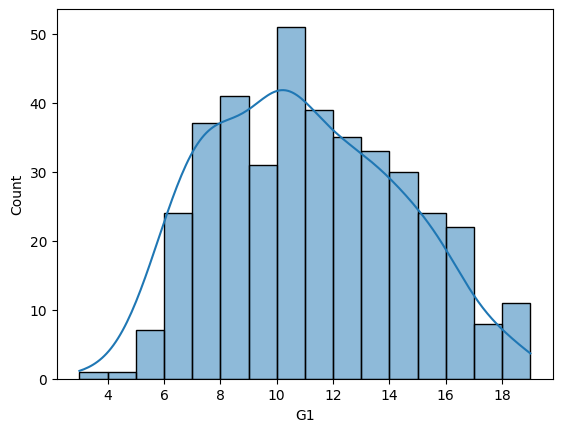

In [49]:
histoPlot(DataTestNor,'G1',1)

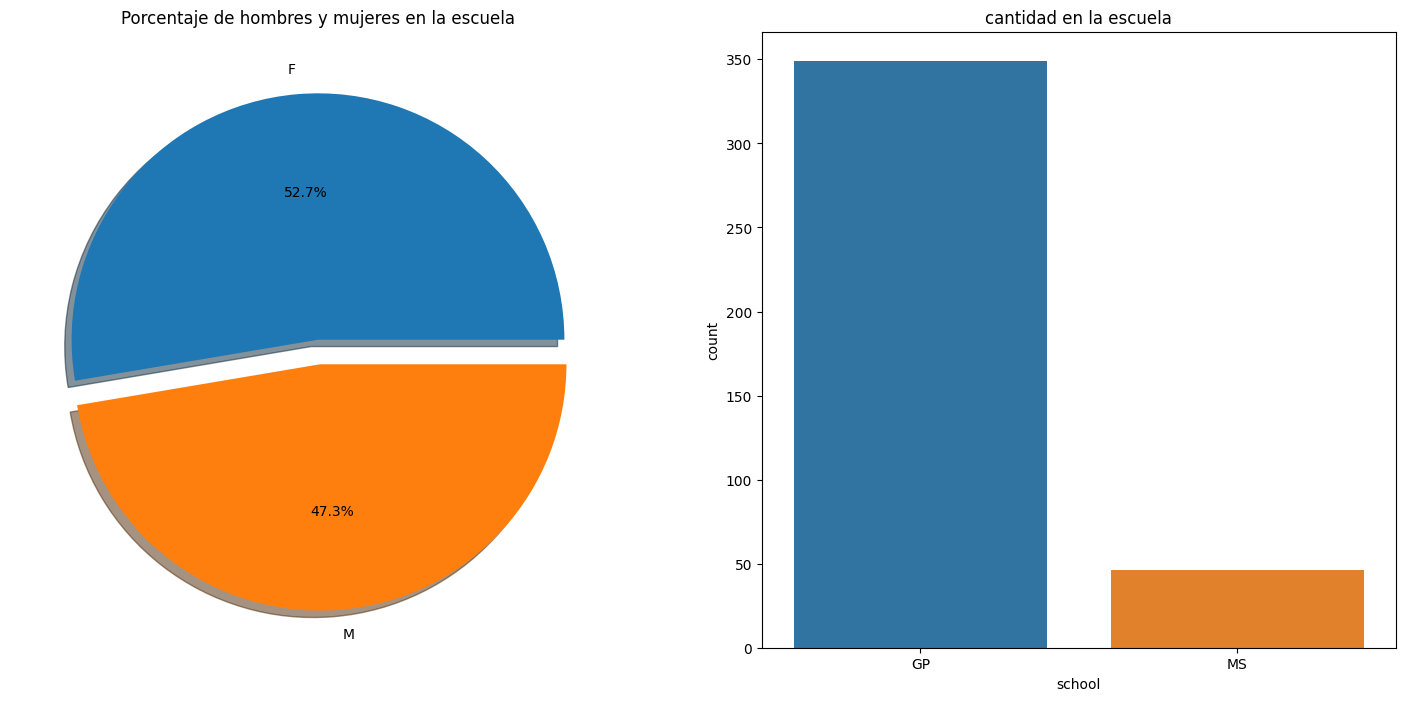

In [59]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Porcentaje de hombres y mujeres en la escuela')
ax[0].set_ylabel('')

sns.countplot( data=data,ax=ax[1], x='school')
ax[1].set_title('cantidad en la escuela')

plt.show()

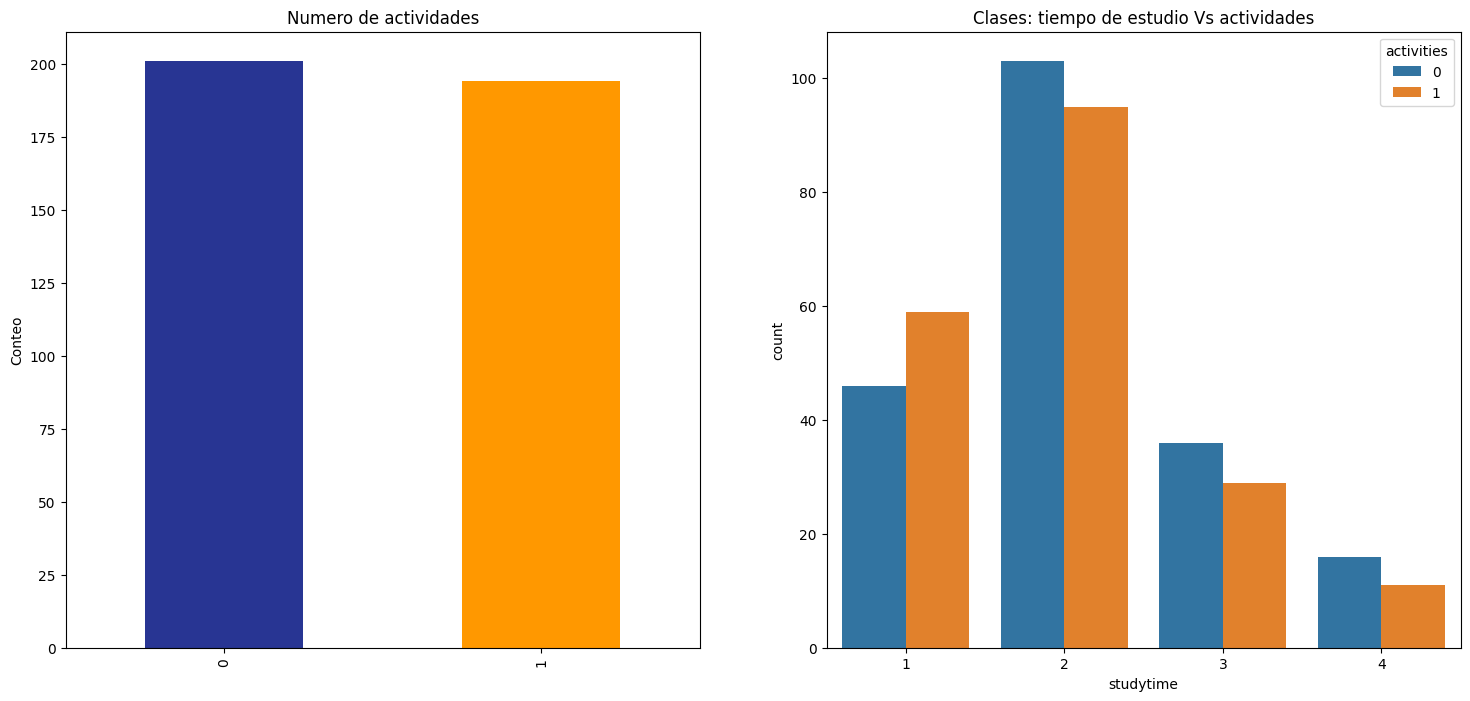

In [63]:
f, ax = plt.subplots(1,2, figsize=(18,8))
DataTestNor['activities'].value_counts().plot.bar(color=['#283593','#ff9800','#1b5e20'], ax=ax[0])
ax[0].set_title('Numero de actividades')
ax[0].set_ylabel('Conteo')

sns.countplot(data=DataTestNor, x='studytime', hue='activities')
ax[1].set_title('Clases: tiempo de estudio Vs actividades')

plt.show()

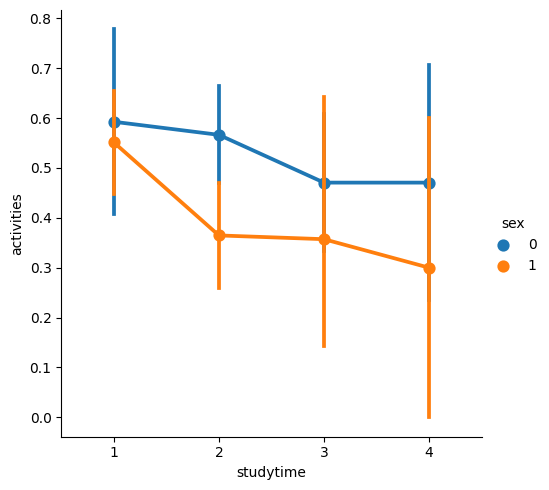

In [69]:
sns.catplot(x='studytime', y='activities', hue='sex', data=DataTestNor,kind="point")
plt.show()

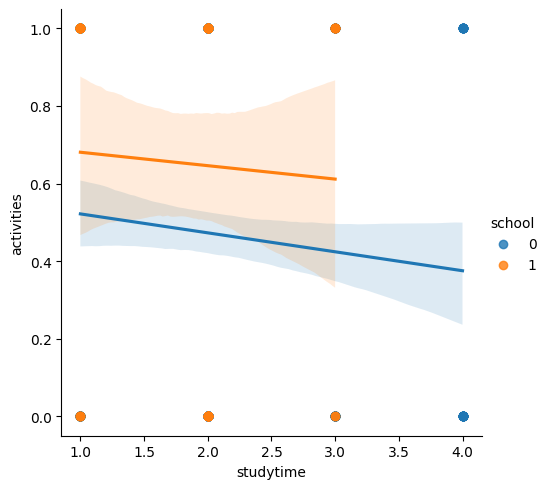

In [73]:
sns.lmplot(x='studytime', y='activities', hue='school', data=DataTestNor)

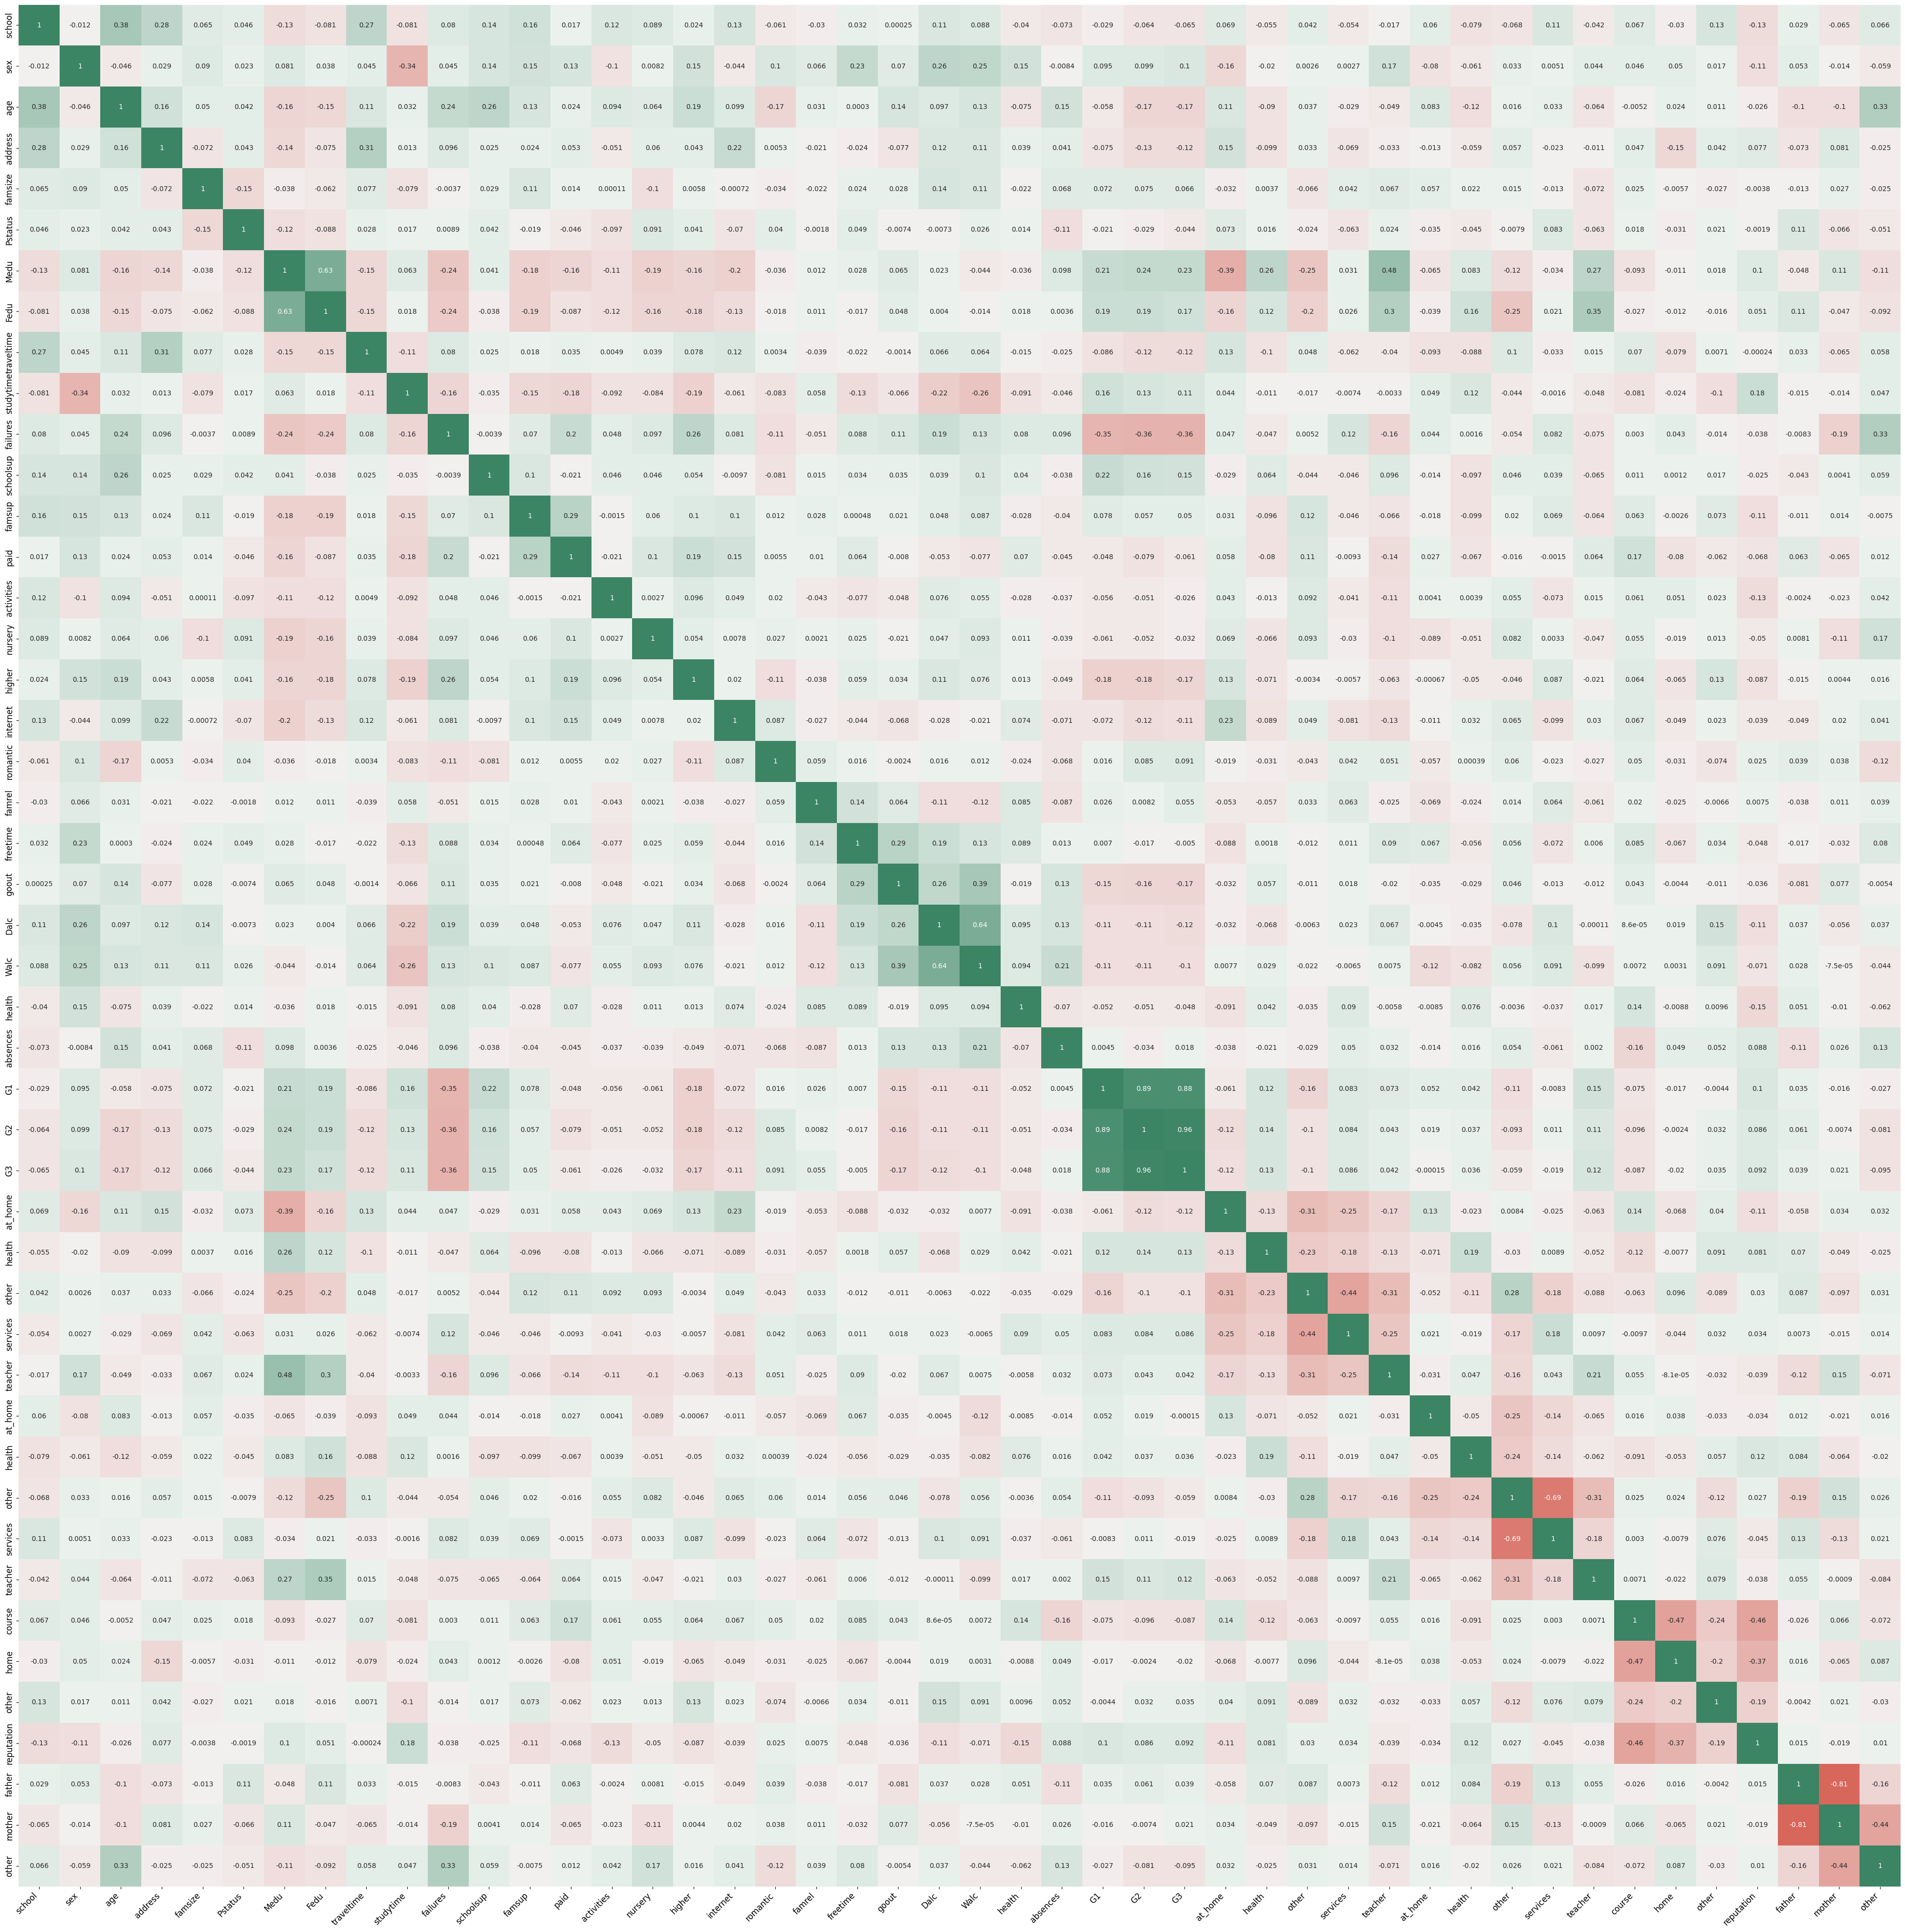

In [48]:
import matplotlib.pyplot as plt
##Grafica correlación
fig , ax = plt.subplots(1,1, figsize=(50,50))

sns.heatmap(
    data_corr,
    annot=True,
    cbar=False,
    annot_kws={"size":10},
    vmin=-1,
    vmax=1,
    center =0,
    cmap=sns.diverging_palette(15,150, n=100),
    square=True,
    ax = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

ax.tick_params(labelsize=12)

In [51]:
##Definir valor de X  y Y
X = DataTestNor.drop(['G1'], axis=1)
y = DataTestNor['G1']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

##Sacar los 4 grupos (2 train y 2 testeo)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=42)

##Entrenar el modelo
ml = LinearRegression()

ml.fit(X_train, y_train)

y_pred = ml.predict(X_test)

round(r2_score(y_test, y_pred),3)*100

78.2

/var/folders/6g/wp1f7dnj1fj73b6w8vdl1wvc0000gn/T/ipykernel_91055/1545302005.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores Actuales')
/var/folders/6g/wp1f7dnj1fj73b6w8vdl1wvc0000gn/T/ipykernel_91055/1545302005.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

<Axes: xlabel='G1', ylabel='Density'>

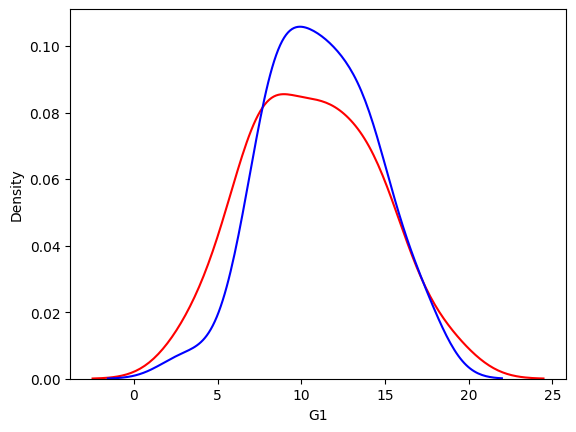

In [52]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores Actuales')
sns.distplot(y_pred, hist=False, color='b', label='Valores Predecidos')

In [54]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

mlTres = sm.OLS(y_train, X_train_sm).fit()

mlTres.params

const        -0.379110
school       -0.344952
sex           0.218880
age           0.122958
address       0.141299
famsize       0.013009
Pstatus       0.338920
Medu         -0.033864
Fedu          0.149455
traveltime    0.258376
studytime     0.280191
failures     -0.313690
schoolsup     1.198794
famsup        0.434095
paid          0.367393
activities    0.181339
nursery       0.082903
higher       -0.877901
internet      0.218608
romantic     -0.414361
famrel        0.041489
freetime      0.117700
goout        -0.050582
Dalc         -0.029386
Walc         -0.095844
health       -0.011712
absences      0.001829
G2            0.538675
G3            0.133107
at_home       0.011341
health        0.160133
other        -0.489495
services      0.113860
teacher      -0.174950
at_home       0.302081
health       -0.331730
other        -0.581581
services     -0.565946
teacher       0.798066
course        0.050739
home         -0.006306
other        -0.614175
reputation    0.190632
father     

In [55]:
print(mlTres.summary())

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     28.50
Date:                Fri, 14 Apr 2023   Prob (F-statistic):           8.58e-83
Time:                        22:08:49   Log-Likelihood:                -647.19
No. Observations:                 355   AIC:                             1378.
Df Residuals:                     313   BIC:                             1541.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3791      0.861     -0.440      0.6